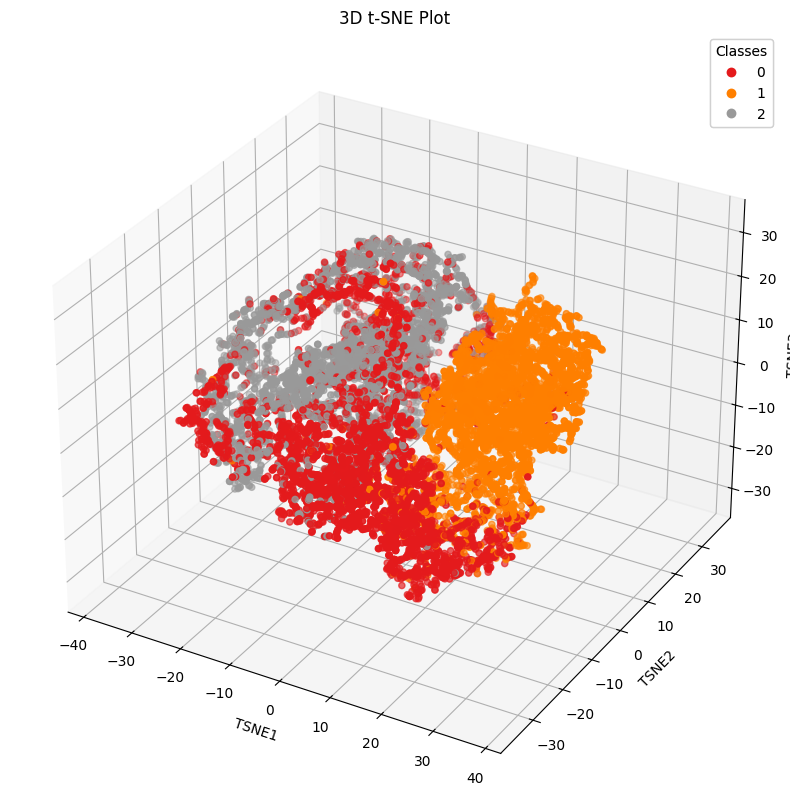

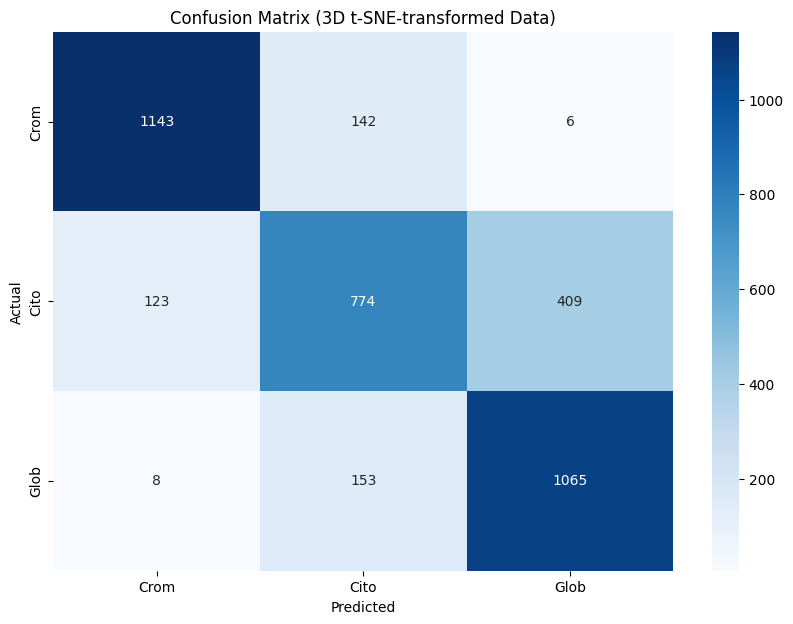

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Function to extract elements from 'centroid' list and assign to new columns
def extract_centroid_elements(sheet):
    sheet['L'] = sheet['centroid'].apply(lambda x: eval(x)[0])
    sheet['A'] = sheet['centroid'].apply(lambda x: eval(x)[1])
    sheet['B'] = sheet['centroid'].apply(lambda x: eval(x)[2])
    sheet['C'] = sheet['centroid'].apply(lambda x: eval(x)[3])
    sheet['H'] = sheet['centroid'].apply(lambda x: eval(x)[4])
    return sheet

# Load the Excel file
file_path = 'Data/kmeans_data_4247.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load each sheet and extract centroid elements
crom_sheet = excel_data.parse('crom')
crom_sheet = extract_centroid_elements(crom_sheet)
crom_sheet['class'] = 'Crom'

cito_sheet = excel_data.parse('cito')
cito_sheet = extract_centroid_elements(cito_sheet)
cito_sheet['class'] = 'Cito'

glob_sheet = excel_data.parse('glob')
glob_sheet = extract_centroid_elements(glob_sheet)
glob_sheet['class'] = 'Glob'

# Combine the sheets into one DataFrame
combined_df = pd.concat([crom_sheet, cito_sheet, glob_sheet], ignore_index=True)

# Select features and target variable
features = ['L', 'A', 'B', 'C', 'H']
X = combined_df[features]
y = combined_df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine an appropriate perplexity value
perplexity = min(10, len(X_scaled) - 1)

# Perform t-SNE to reduce to 3 dimensions
tsne_model_3d = TSNE(n_components=3, random_state=42, perplexity=perplexity)
X_tsne_3d = tsne_model_3d.fit_transform(X_scaled)

# Create a DataFrame with t-SNE components and the class labels
tsne_df_3d = pd.DataFrame(X_tsne_3d, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df_3d['class'] = y.values

# Plot t-SNE (3D)
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_df_3d['TSNE1'], tsne_df_3d['TSNE2'], tsne_df_3d['TSNE3'], c=tsne_df_3d['class'].astype('category').cat.codes, cmap='Set1')

# Produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

ax.set_title('3D t-SNE Plot')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.show()

# Split the t-SNE-transformed data into training and testing sets
X_train_tsne_3d, X_test_tsne_3d, y_train, y_test = train_test_split(X_tsne_3d, y, test_size=0.3, random_state=42)

# Create and train the Support Vector Machine model on t-SNE-transformed data
svm_model_tsne_3d = svm.SVC(kernel='linear')
svm_model_tsne_3d.fit(X_train_tsne_3d, y_train)

# Make predictions
y_pred_tsne_3d = svm_model_tsne_3d.predict(X_test_tsne_3d)

# Generate a classification report
report_tsne_3d = classification_report(y_test, y_pred_tsne_3d, output_dict=True)

# Generate the confusion matrix
conf_matrix_tsne_3d = confusion_matrix(y_test, y_pred_tsne_3d, labels=['Crom', 'Cito', 'Glob'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tsne_3d, annot=True, fmt='d', cmap='Blues', xticklabels=['Crom', 'Cito', 'Glob'], yticklabels=['Crom', 'Cito', 'Glob'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (3D t-SNE-transformed Data)')
plt.show()

# Display classification report
report_df_tsne_3d = pd.DataFrame(report_tsne_3d).transpose()

In [2]:
report_df_tsne_3d

,precision,recall,f1-score,support
Cito,0.724041,0.592649,0.651789,1306.000000
Crom,0.897174,0.885360,0.891228,1291.000000
Glob,0.719595,0.868679,0.787140,1226.000000
accuracy,0.780016,0.780016,0.780016,0.780016
macro avg,0.780270,0.782229,0.776719,3823.000000
weighted avg,0.781081,0.780016,0.776052,3823.000000


In [36]:
# Function to make predictions with new data
def predict_new_data_tsne_3d(data):
    new_data = data
    new_data_scaled = scaler.transform(new_data)
    new_data_tsne_3d = tsne_model_3d.fit_transform(new_data_scaled)
    prediction = svm_model_tsne_3d.predict(new_data_tsne_3d)
    return prediction

In [37]:
subset_size = min(60, len(X))
print(subset_size)
predicted_class = predict_new_data_tsne_3d(X[:subset_size])
print("La clase predicha para el nuevo dato es:", predicted_class)

60
La clase predicha para el nuevo dato es: ['Cito' 'Glob' 'Crom' 'Glob' 'Crom' 'Glob' 'Crom' 'Crom' 'Glob' 'Crom'
 'Crom' 'Crom' 'Crom' 'Crom' 'Glob' 'Crom' 'Cito' 'Crom' 'Crom' 'Crom'
 'Crom' 'Crom' 'Crom' 'Cito' 'Crom' 'Glob' 'Glob' 'Cito' 'Cito' 'Cito'
 'Glob' 'Cito' 'Glob' 'Glob' 'Glob' 'Crom' 'Glob' 'Cito' 'Crom' 'Crom'
 'Glob' 'Glob' 'Crom' 'Glob' 'Glob' 'Cito' 'Crom' 'Crom' 'Crom' 'Glob'
 'Crom' 'Cito' 'Crom' 'Glob' 'Glob' 'Cito' 'Glob' 'Cito' 'Cito' 'Glob']


In [3]:
# En 2D

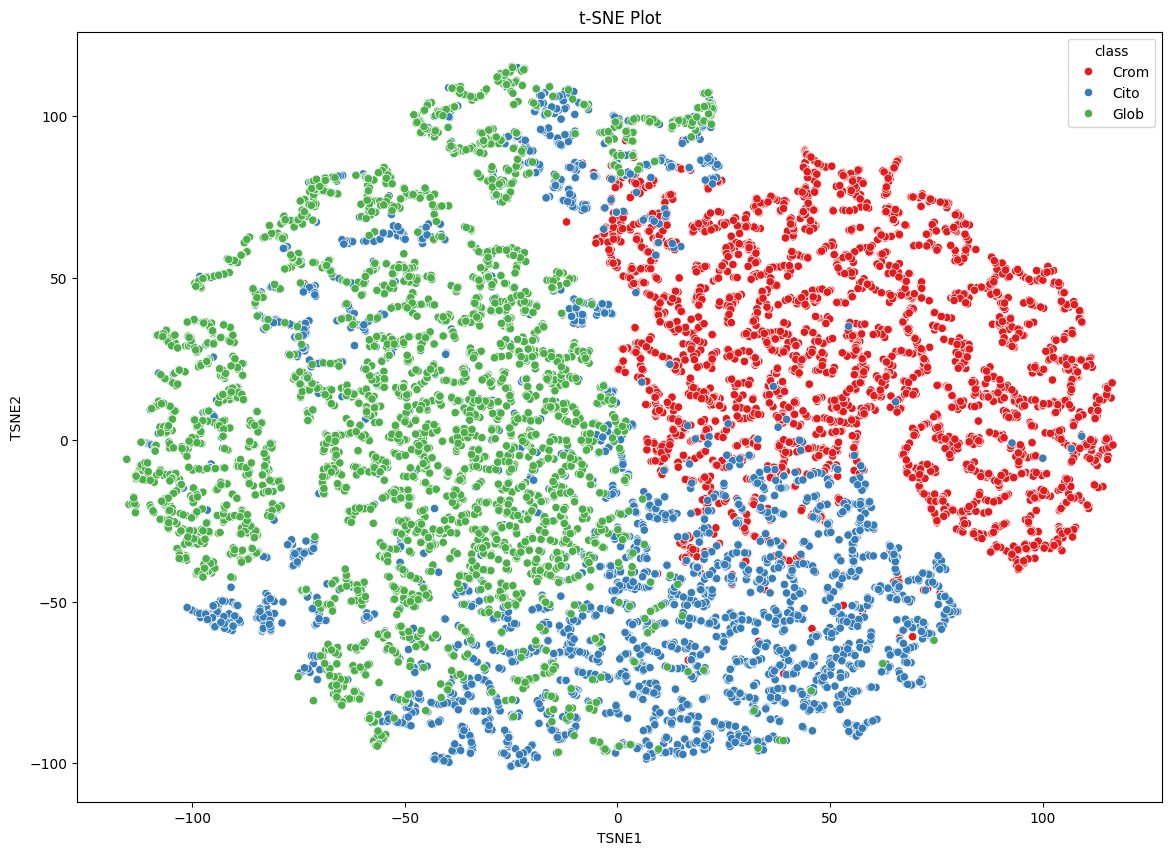

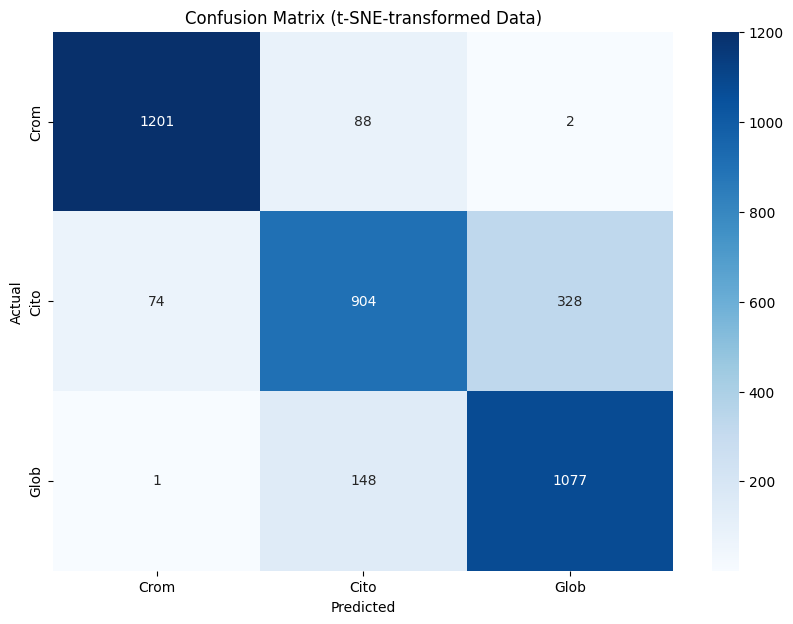

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to extract elements from 'centroid' list and assign to new columns
def extract_centroid_elements(sheet):
    sheet['L'] = sheet['centroid'].apply(lambda x: eval(x)[0])
    sheet['A'] = sheet['centroid'].apply(lambda x: eval(x)[1])
    sheet['B'] = sheet['centroid'].apply(lambda x: eval(x)[2])
    sheet['C'] = sheet['centroid'].apply(lambda x: eval(x)[3])
    sheet['H'] = sheet['centroid'].apply(lambda x: eval(x)[4])
    return sheet

# Load the Excel file
file_path = 'Data/kmeans_data_4247.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load each sheet and extract centroid elements
crom_sheet = excel_data.parse('crom')
crom_sheet = extract_centroid_elements(crom_sheet)
crom_sheet['class'] = 'Crom'

cito_sheet = excel_data.parse('cito')
cito_sheet = extract_centroid_elements(cito_sheet)
cito_sheet['class'] = 'Cito'

glob_sheet = excel_data.parse('glob')
glob_sheet = extract_centroid_elements(glob_sheet)
glob_sheet['class'] = 'Glob'

# Combine the sheets into one DataFrame
combined_df = pd.concat([crom_sheet, cito_sheet, glob_sheet], ignore_index=True)

# Select features and target variable
features = ['L', 'A', 'B', 'C', 'H']
X = combined_df[features]
y = combined_df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine an appropriate perplexity value
perplexity = min(10, len(X_scaled) - 1)

# Perform t-SNE to reduce to 2 dimensions
tsne_model = TSNE(n_components=2, random_state=42, perplexity=perplexity)
X_tsne = tsne_model.fit_transform(X_scaled)

# Create a DataFrame with t-SNE components and the class labels
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['class'] = y.values

# Plot t-SNE
plt.figure(figsize=(14, 10))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=tsne_df, palette='Set1')
plt.title('t-SNE Plot')
plt.show()

# Split the t-SNE-transformed data into training and testing sets
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

# Create and train the Support Vector Machine model on t-SNE-transformed data
svm_model_tsne = svm.SVC(kernel='rbf')
svm_model_tsne.fit(X_train_tsne, y_train)

# Make predictions
y_pred_tsne = svm_model_tsne.predict(X_test_tsne)

# Generate a classification report
report_tsne = classification_report(y_test, y_pred_tsne, output_dict=True)

# Generate the confusion matrix
conf_matrix_tsne = confusion_matrix(y_test, y_pred_tsne, labels=['Crom', 'Cito', 'Glob'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tsne, annot=True, fmt='d', cmap='Blues', xticklabels=['Crom', 'Cito', 'Glob'], yticklabels=['Crom', 'Cito', 'Glob'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (t-SNE-transformed Data)')
plt.show()

# Display classification report
report_df_tsne = pd.DataFrame(report_tsne).transpose()

In [5]:
report_df_tsne

,precision,recall,f1-score,support
Cito,0.792982,0.692190,0.739166,1306.000000
Crom,0.941223,0.930287,0.935723,1291.000000
Glob,0.765458,0.878467,0.818078,1226.000000
accuracy,0.832331,0.832331,0.832331,0.832331
macro avg,0.833221,0.833648,0.830989,3823.000000
weighted avg,0.834215,0.832331,0.830848,3823.000000


In [6]:
# Function to make predictions with new data
def predict_new_data_tsne(data):
    new_data = data
    new_data_scaled = scaler.transform(new_data)
    new_data_tsne = tsne_model.fit_transform(new_data_scaled)
    prediction = svm_model_tsne.predict(new_data_tsne)
    return prediction

In [7]:
subset_size = min(80, len(X))
print(subset_size)
predicted_class = predict_new_data_tsne(X[:subset_size])
print("La clase predicha para el nuevo dato es:", predicted_class)

80
La clase predicha para el nuevo dato es: ['Glob' 'Crom' 'Glob' 'Glob' 'Glob' 'Glob' 'Glob' 'Glob' 'Crom' 'Glob'
 'Glob' 'Glob' 'Glob' 'Glob' 'Glob' 'Glob' 'Crom' 'Glob' 'Glob' 'Glob'
 'Glob' 'Glob' 'Glob' 'Crom' 'Crom' 'Crom' 'Glob' 'Crom' 'Crom' 'Crom'
 'Cito' 'Crom' 'Crom' 'Crom' 'Crom' 'Crom' 'Glob' 'Crom' 'Crom' 'Glob'
 'Crom' 'Crom' 'Crom' 'Crom' 'Cito' 'Crom' 'Glob' 'Cito' 'Glob' 'Crom'
 'Glob' 'Cito' 'Cito' 'Crom' 'Crom' 'Crom' 'Cito' 'Glob' 'Glob' 'Glob'
 'Crom' 'Glob' 'Glob' 'Crom' 'Crom' 'Cito' 'Crom' 'Glob' 'Glob' 'Crom'
 'Cito' 'Cito' 'Glob' 'Cito' 'Cito' 'Crom' 'Crom' 'Crom' 'Crom' 'Glob']
